In [ ]:
!pip install kaggle

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
api = KaggleApi()
api.authenticate()

In [4]:
api.dataset_download_files('russellyates88/suicide-rates-overview-1985-to-2016')


In [ ]:
with zipfile.ZipFile("suicide-rates-overview-1985-to-2016.zip","r") as zip_file:
    zip_file.extractall("targetdir")

In [7]:
zf = ZipFile('suicide-rates-overview-1985-to-2016.zip', 'r')
zf.extractall('proj_1')
zf.close()


In [3]:
suicide_dataset = pd.read_csv('./master.csv')

In [4]:
suicide_dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Explore Dataset (understand the data)

In [5]:
country_list = suicide_dataset['country'].unique().tolist()

print(f'There\'s a total of {len(country_list)} countries in this dataset ')

There's a total of 101 countries in this dataset 


In [6]:
suicide_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
suicide_dataset.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
suicide_dataset.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

## Since `HDI for year` is the only column with null, I am going to remove the column.

In [9]:
suicide_dataset = suicide_dataset.drop('HDI for year', axis = 1)

In [10]:
suicide_dataset.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

Now we are going to remove unnecessary columns or rename some of the column name.

In [11]:
column_names = suicide_dataset.columns.tolist()

In [16]:
for col in column_names:
    if '($)' in col:
        col_1 = col.replace('($)', '').strip().title()
    else:
        col_1 = col.strip().title()
    if not col == col_1:
        suicide_dataset.rename(columns={col: col_1}, inplace=True)

In [17]:
column_names = suicide_dataset.columns.tolist()

column_names

['Country',
 'Year',
 'Sex',
 'Age',
 'Suicides_No',
 'Population',
 'Suicides/100K Pop',
 'Country-Year',
 'Gdp_For_Year',
 'Gdp_Per_Capita',
 'Generation']

In [18]:
# Return tuple of shape (rows, columns) of df
suicide_dataset.shape

(27820, 11)

In [19]:
suicide_dataset.isnull().any()

Country              False
Year                 False
Sex                  False
Age                  False
Suicides_No          False
Population           False
Suicides/100K Pop    False
Country-Year         False
Gdp_For_Year         False
Gdp_Per_Capita       False
Generation           False
dtype: bool

In [21]:
# Now we need to figure out what is the year range of the dataset

min_year=min(suicide_dataset.Year)
max_year=max(suicide_dataset.Year)

print('Min Year :',min_year)
print('Max Year :',max_year)


Min Year : 1985
Max Year : 2016


In [48]:
year_1985_data = suicide_dataset[(suicide_dataset['Year']==min_year)]

year_2016_data = suicide_dataset[(suicide_dataset['Year']==max_year)]


year_1985_country = year_1985_data.Country.unique().tolist()
year_2016_country = year_2016_data.Country.unique().tolist()

In [53]:
year_1985_population_list = []

year_1985_population= pd.DataFrame()

for country in year_1985_country:
    year_1985_population_list.append(sum(year_1985_data.loc[year_1985_data['Country']==country].Population))
    

year_2016_population_list = []

year_2016_population = pd.DataFrame()

for country in year_2016_country:
    
    year_2016_population_list.append(sum(year_2016_data.loc[year_2016_data['Country']==country].Population))

In [54]:
year_1985_population['Country'] = year_1985_country
year_1985_population['Population'] = year_1985_population_list

year_2016_population['Country'] = year_2016_country
year_2016_population['Population'] = year_2016_population_list

In [61]:
year_1985_population = year_1985_population.sort_values('Population')

year_2016_population = year_2016_population.sort_values('Population')


Text(0.5, 1.0, 'Total Suicide Rate per Country in Year 1985')

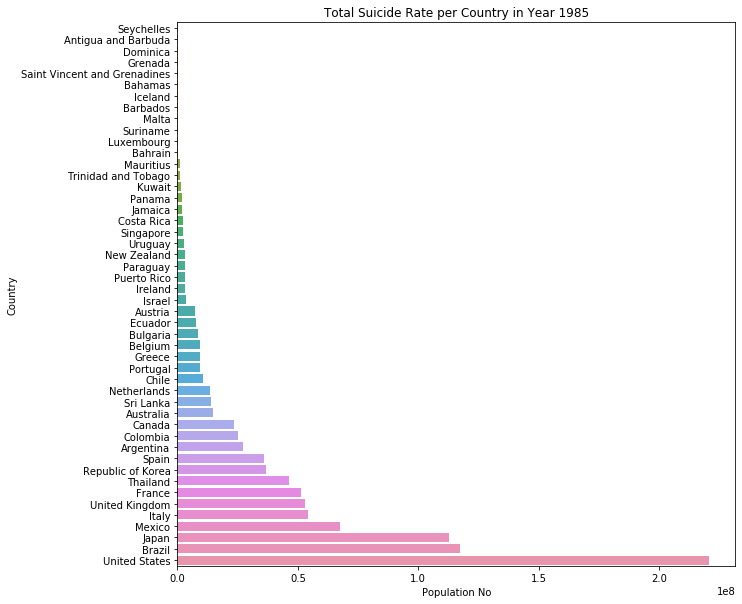

In [60]:
plt.figure(figsize=(10,10))
sns.barplot(y=year_1985_population['Country'], x=year_1985_population['Population'])
plt.xlabel('Population No')
plt.ylabel('Country')
plt.title('Total Suicide Rate per Country in Year 1985')

Text(0.5, 1.0, 'Total Suicide Rate per Country in Year 1985')

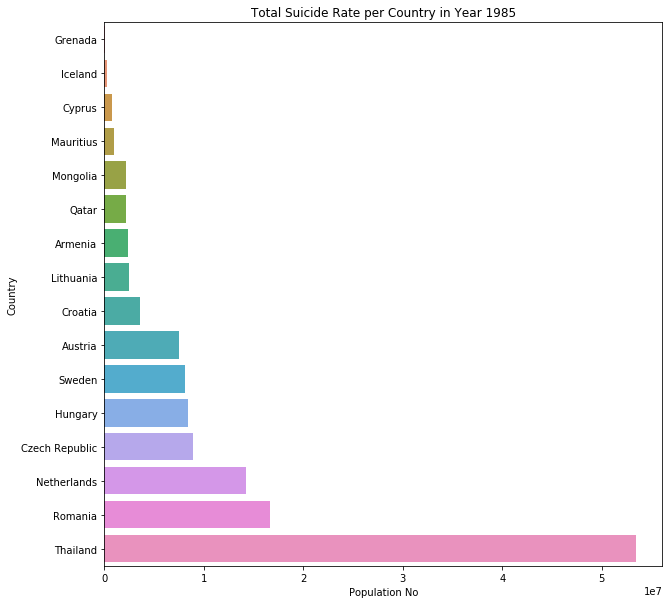

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(y=year_2016_population['Country'], x=year_2016_population['Population'])
plt.xlabel('Population No')
plt.ylabel('Country')
plt.title('Total Suicide Rate per Country in Year 1985')

In [67]:
suicide_dataset.head()

,Country,Year,Sex,Age,Suicides_No,Population,Suicides/100K Pop,Country-Year,Gdp_For_Year,Gdp_Per_Capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


# Get Suicide Rate by Year

In [75]:
suicide_num = list()

year_list = suicide_dataset['Year'].unique()

for year in year_list:
    suicide_num.append(sum(suicide_dataset.loc[suicide_dataset['Year'] ==  year]['Suicides_No']))


suicide_total_df = pd.DataFrame({
    'Year': year_list,
    'Suicide Number': suicide_num
})

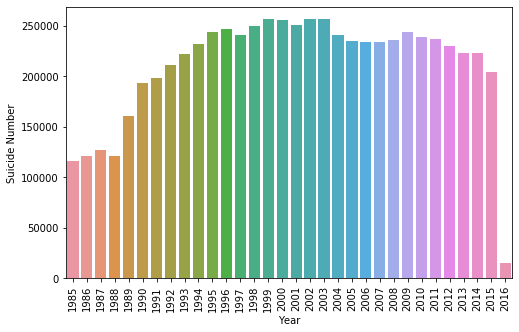

In [79]:
suicide_total_df = suicide_total_df.sort_values('Suicide Number', ascending=False)


plt.figure(figsize=(8,5))
plt.xticks(rotation=90)

sns.barplot(x = suicide_total_df['Year'], y = suicide_total_df['Suicide Number'])

# Suicide Rate by Age

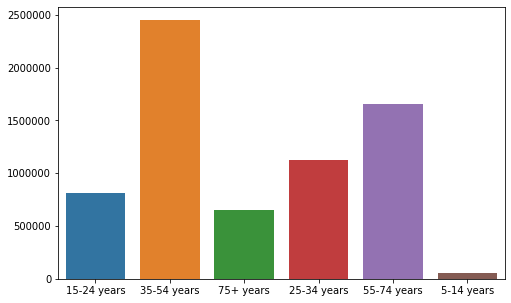

In [115]:
age_range_list = suicide_dataset['Age'].unique()

suicide_num_age = list()

for age in age_range_list:
    suicide_num_age.append(sum(suicide_dataset.loc[suicide_dataset['Age'] == age]['Suicides_No']))
    

plt.figure(figsize=(8,5))
plt.xticks(rotation=0)

sns.barplot(x = age_range_list, y = suicide_num_age)

# Suicide No by Sex

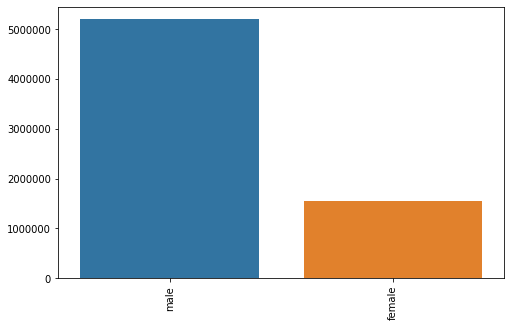

In [86]:
sex_list = suicide_dataset['Sex'].unique()

suicide_num_sex = list()

for sex in sex_list:
    suicide_num_sex.append(sum(suicide_dataset.loc[suicide_dataset['Sex'] == sex]['Suicides_No']))
    

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)

sns.barplot(x = sex_list, y = suicide_num_sex)

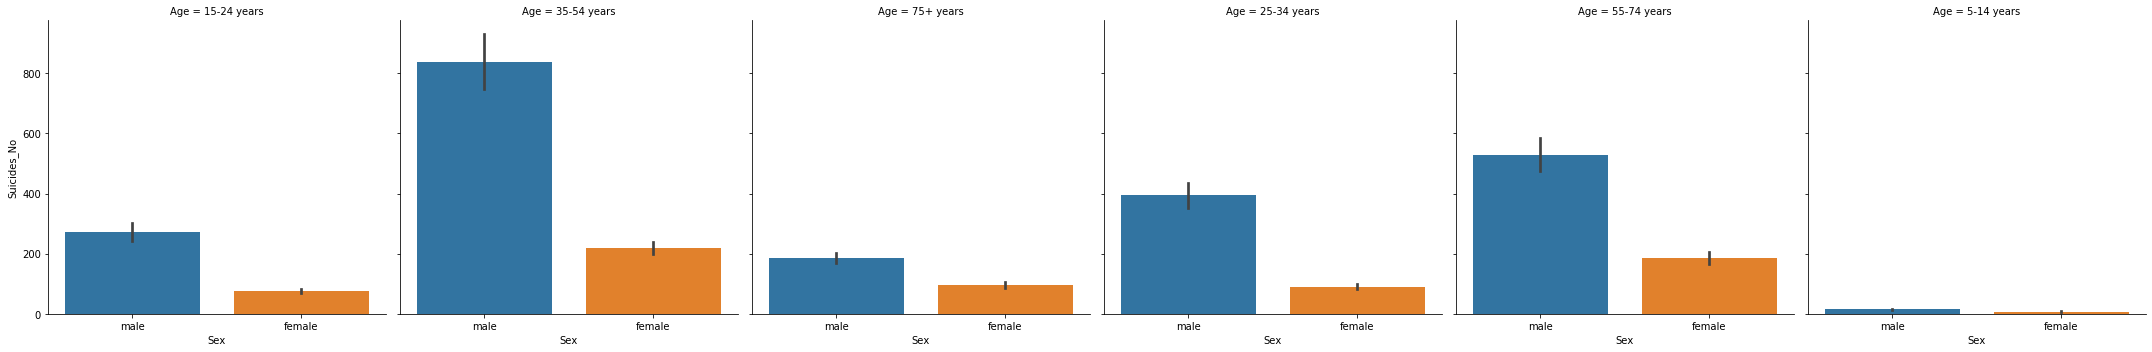

In [89]:
sns.catplot(x='Sex', y='Suicides_No',col='Age', data=suicide_dataset, kind='bar')


# Suicide Rate by Country


In [ ]:
suicides_no_pais = []
for c in df['country'].unique():
    suicides_no_pais.append(sum(df[df['country'] == c]['suicides_no']))
    
n_suicides_pais = pd.DataFrame(suicides_no_pais, columns=['suicides_no_pais'])
n_suicides_pais['country'] = df['country'].unique()

quant = 15
top_paises = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['country'][:quant]
top_suicides = n_suicides_pais.sort_values('suicides_no_pais', ascending=False)['suicides_no_pais'][:quant]
sns.barplot(x = top_suicides, y = top_paises)

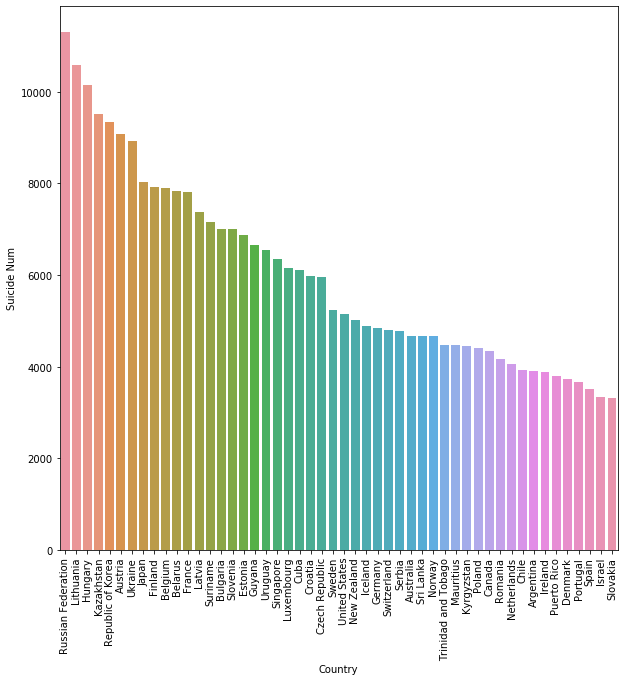

In [101]:
country_list = suicide_dataset['Country'].unique()


suicide_num_country = list()

for country in country_list:
    suicide_num_country.append(sum(suicide_dataset.loc[suicide_dataset['Country'] == country]['Suicides/100K Pop']))
    
country_suicide_df = pd.DataFrame({
    'Country': country_list,
    'Suicide Num': suicide_num_country
})
#Slice dataset 
country_suicide_df = country_suicide_df.sort_values('Suicide Num', ascending=False).iloc[:50]


plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x=country_suicide_df['Country'], y=country_suicide_df['Suicide Num'])

In [170]:
import random

country_list = suicide_dataset['Country'].unique().tolist()


random_country = random.sample(country_list, 10)


In [171]:
random_country 

['Serbia',
 'Albania',
 'Ecuador',
 'Guatemala',
 'Singapore',
 'Macau',
 'Bosnia and Herzegovina',
 'Mexico',
 'Cabo Verde',
 'Switzerland']

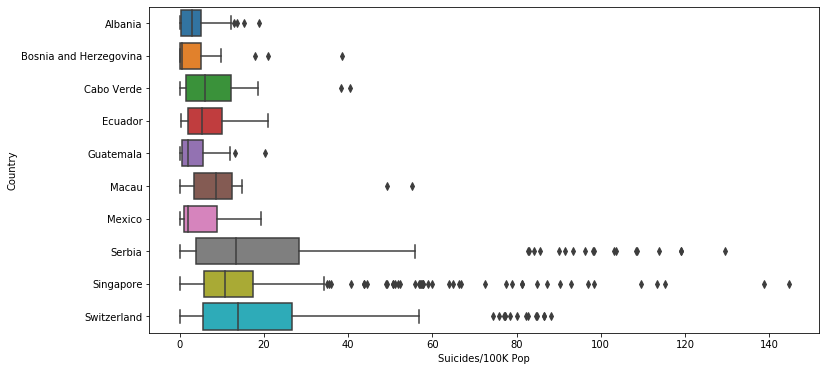

In [172]:
random_country_data = suicide_dataset[suicide_dataset['Country'].isin(random_country)]
plt.figure(figsize=(12,6))
sns.boxplot(x='Suicides/100K Pop', y = 'Country', data=random_country_data)

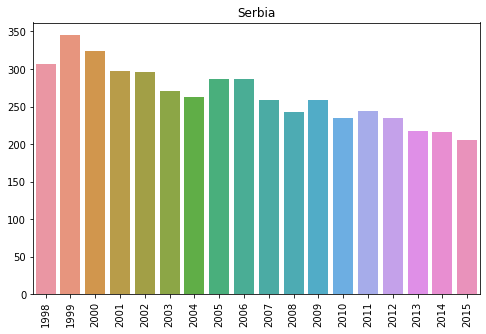

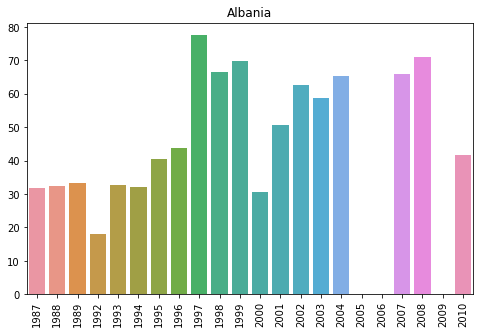

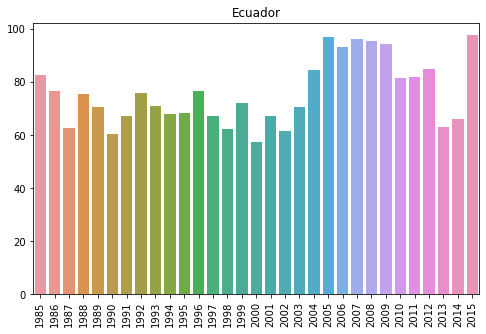

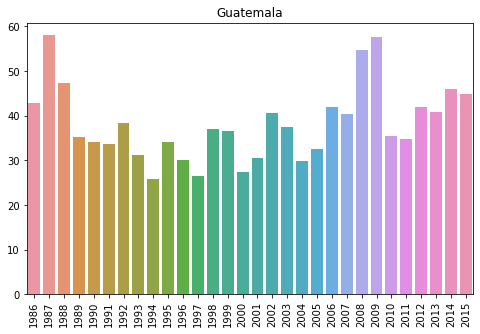

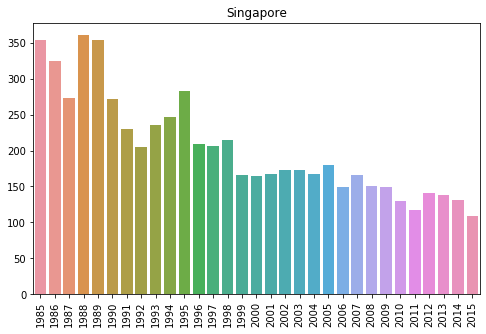

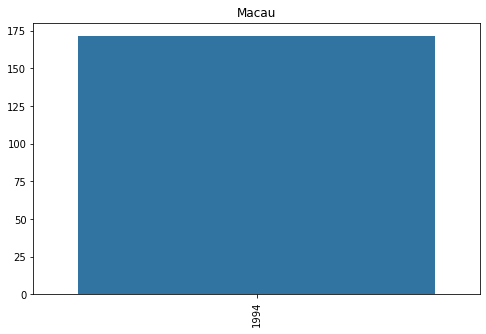

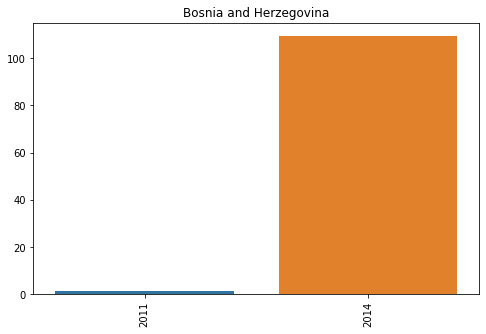

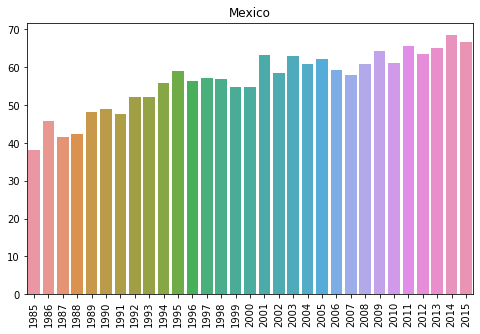

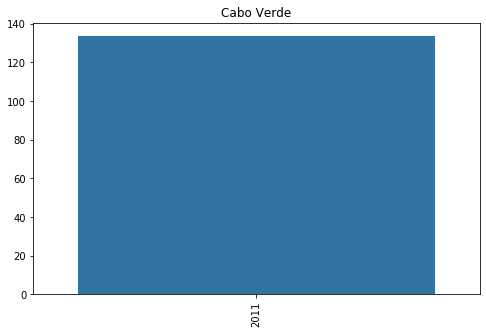

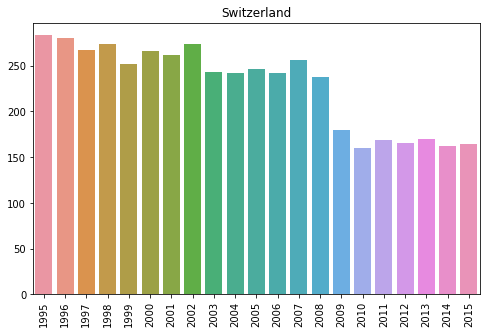

In [184]:
country_df = suicide_dataset[suicide_dataset['Country'].isin(random_country)]

country_df = country_df[['Country','Year','Suicides/100K Pop']]

country_data = pd.DataFrame()


for country in random_country:
    data_list = list()
    year_list = list()

    country_filtered = country_df.loc[country_df['Country'] == country]
    year_unique = country_filtered['Year'].unique()
    for year in year_unique:
        tmp_data = sum(country_filtered.loc[country_filtered['Year'] == year]['Suicides/100K Pop'])
        data_list.append(tmp_data)
        year_list.append(year)
        
        
    plt.figure(figsize=(8,5))
    plt.xticks(rotation=90)
    plt.title(country)
    sns.barplot(x = year_list, y = data_list)
    


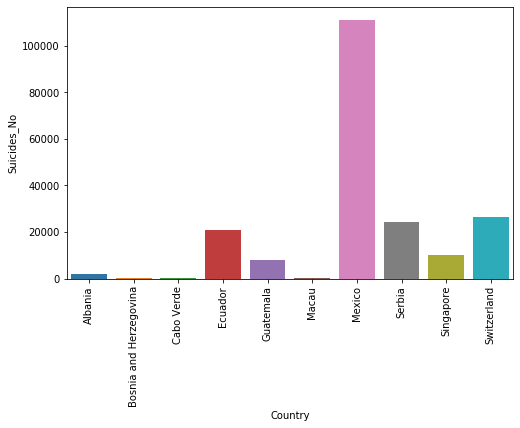

In [232]:
country_grp = random_country_data.groupby(['Country'], as_index = False).sum()
# country_grp.columns
country_grp[['Country', 'Suicides_No']].sort_values('Suicides_No')

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(x = country_grp['Country'], y =country_grp['Suicides_No'], data = country_grp)

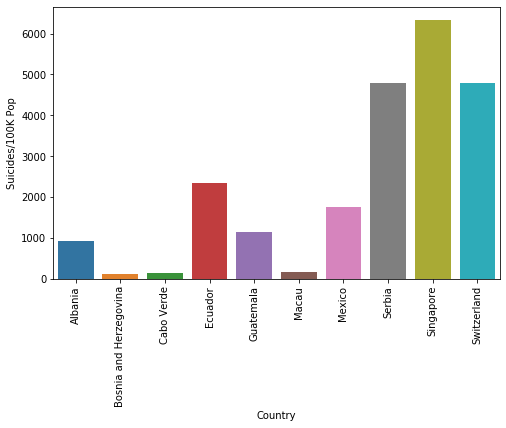

In [234]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(x = country_grp['Country'], y =country_grp['Suicides/100K Pop'], data = country_grp)

In [222]:
random_country_data = suicide_dataset[suicide_dataset['Country'].isin(random_country)]
random_country_data

,Country,Year,Sex,Age,Suicides_No,Population,Suicides/100K Pop,Country-Year,Gdp_For_Year,Gdp_Per_Capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
24973,Switzerland,2015,female,55-74 years,82,922222,8.89,Switzerland2015,"679,289,166,858",86068,Boomers
24974,Switzerland,2015,female,15-24 years,20,462559,4.32,Switzerland2015,"679,289,166,858",86068,Millenials
24975,Switzerland,2015,female,25-34 years,24,577973,4.15,Switzerland2015,"679,289,166,858",86068,Millenials
24976,Switzerland,2015,female,5-14 years,2,390910,0.51,Switzerland2015,"679,289,166,858",86068,Generation Z


In [279]:
tmp_df01 = random_country_data.groupby(['Year', 'Age'])

In [ ]:
for key, item in tmp_df01:
    year, age = key
    
#     plt.figure(figsize=(8,5))
#     plt.xticks(rotation=90)
#     plt.title(key)
#     sns.barplot(x = tmp_df01.get_group(key)['Country'], y =tmp_df01.get_group(key)['Suicides/100K Pop'])

In [289]:
for i in range(len(tmp_df01)):
    print(tmp_df01[i])

KeyError: 'Column not found: 0'

In [ ]:
df.groupby('Fruit').apply(lambda x: x.index.tolist())

In [295]:
tmp_df02 = random_country_data.groupby(['Year', 'Age']).apply(lambda x:x)
min_year = min(tmp_df02['Year'].unique())
max_year = max(tmp_df02['Year'].unique())

In [297]:
(min_year,max_year)

(1985, 2015)

In [294]:
tmp_df02

,Country,Year,Sex,Age,Suicides_No,Population,Suicides/100K Pop,Country-Year,Gdp_For_Year,Gdp_Per_Capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
24973,Switzerland,2015,female,55-74 years,82,922222,8.89,Switzerland2015,"679,289,166,858",86068,Boomers
24974,Switzerland,2015,female,15-24 years,20,462559,4.32,Switzerland2015,"679,289,166,858",86068,Millenials
24975,Switzerland,2015,female,25-34 years,24,577973,4.15,Switzerland2015,"679,289,166,858",86068,Millenials
24976,Switzerland,2015,female,5-14 years,2,390910,0.51,Switzerland2015,"679,289,166,858",86068,Generation Z


- Get barplot for each country in min and max year data


In [ ]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(x = tmp_df02, y =tmp_df01.get_group(key)['Suicides/100K Pop'])

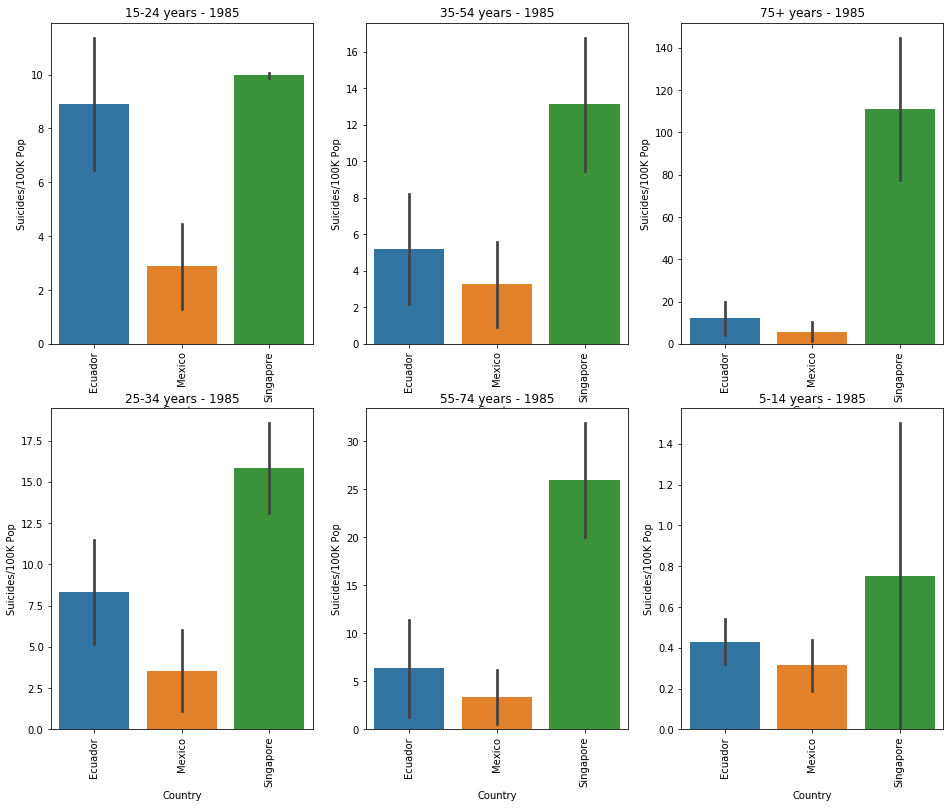

In [318]:
fig = plt.figure(figsize=(16,13))
i = 1
for age in age_range_list:
    filtered_df = tmp_df02.loc[((tmp_df02['Age'] == age) & (tmp_df02['Year']== min_year))]
    ax = fig.add_subplot(2,3,i)
    i+=1
    plt.title(f'{age} - {min_year}')
    plt.xticks(rotation=90)
    sns.barplot(x = filtered_df['Country'], y =filtered_df['Suicides/100K Pop'])

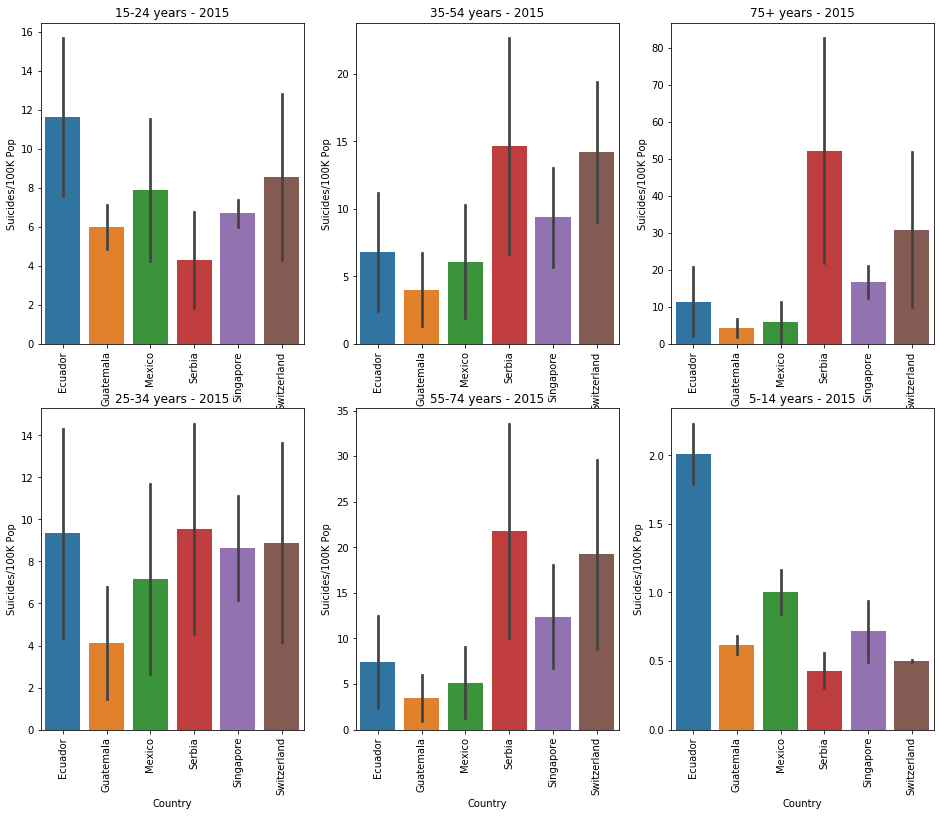

In [319]:
fig = plt.figure(figsize=(16,13))
i = 1
for age in age_range_list:
    filtered_df = tmp_df02.loc[((tmp_df02['Age'] == age) & (tmp_df02['Year']== max_year))]
    ax = fig.add_subplot(2,3,i)
    i+=1
    plt.title(f'{age} - {max_year}')
    plt.xticks(rotation=90)
    sns.barplot(x = filtered_df['Country'], y =filtered_df['Suicides/100K Pop'])